<a href="https://colab.research.google.com/github/shubh2016shiv/Machine-Learning-Project-in-Finance-Domain/blob/main/Lending_Club_Dataset_ML_Assignment_PART_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of some important python libraries

In [ ]:
!pip install --upgrade --q --no-cache-dir gdown
!gdown 1KSyN27_9wC69tdUdPNRzvzxwI_32PnKb

Downloading...
From: https://drive.google.com/uc?id=1KSyN27_9wC69tdUdPNRzvzxwI_32PnKb
To: /content/requirements.txt
100% 333/333 [00:00<00:00, 663kB/s]


In [ ]:
!pip install --q -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.6/288.6 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.5/381.5 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**RESTART THE RUNTIME AFTER EXECUTING ABOVE CELLS**

---


## Downloading Lending Club Dataset in Colab

In [ ]:
!gdown 1PA2OMmdnptQ-mv81rCcKSirOJsBegH-8

Downloading...
From: https://drive.google.com/uc?id=1PA2OMmdnptQ-mv81rCcKSirOJsBegH-8
To: /content/Loan_status_2007-2020Q3.gzip
100% 1.77G/1.77G [00:17<00:00, 100MB/s] 


## Clustering loans based on Risk (Clustering Problem)

### Imports

In [ ]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples, silhouette_score

from scipy import stats
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

#from yellowbrick.cluster import KElbowVisualizer
#from yellowbrick.cluster import SilhouetteVisualizer
#from sklearn.manifold import TSNE


from yellowbrick.cluster import KElbowVisualizer
from matplotlib import cm, colors
from matplotlib import pyplot as plt
from pycaret.clustering import *

import warnings
import gc

In [ ]:
warnings.filterwarnings(action='ignore')

### Reading loan data into Dataframe

In [ ]:
# Read the Lending Club loan dataset using 1 million rows into dataframe
loan_data = pd.read_csv("/content/Loan_status_2007-2020Q3.gzip",low_memory=True,nrows=1000000)

In [ ]:
# Show the top 5 rows from the loano dataframe 
loan_data.head()

Unnamed: 0       id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0           0  1077501     5000.0       5000.0           4975.0   36 months   
1           1  1077430     2500.0       2500.0           2500.0   60 months   
2           2  1077175     2400.0       2400.0           2400.0   36 months   
3           3  1076863    10000.0      10000.0          10000.0   36 months   
4           4  1075358     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-2011   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-2011  Charged Off   
2           RENT     12252.0        Not Verified  Dec-2011   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-2011   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-2011   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA  20.00   
4           other              Personal    972xx         OR  17.94   

   delinq_2yrs earliest_cr_line  fico_range_low  fico_range_high  \
0          0.0         Jan-1985           735.0            739.0   
1          0.0         Apr-1999           740.0            744.0   
2          0.0         Nov-2001           735.0            739.0   
3          0.0         Feb-1996           690.0            694.0   
4          0.0         Jan-1996           695.0            699.0   

   inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  \
0             1.0                     NaN                     NaN       3.0   
1             5.0                     NaN                     NaN       3.0   
2             2.0                     NaN                     NaN       2.0   
3             1.0                    35.0                     NaN      10.0   
4             0.0                    38.0                     NaN      15.0   

   pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0      0.0    13648.0      83.7%        9.0                   f        0.0   
1      0.0     1687.0       9.4%        4.0                   f        0.0   
2      0.0     2956.0      98.5%       10.0                   f        0.0   
3      0.0     5598.0        21%       37.0                   f        0.0   
4      0.0    27783.0      53.9%       38.0                   f        0.0   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0            0.0   5863.155187          5833.84          5000.00   
1            0.0   1014.530000          1014.53           456.46   
2            0.0   3005.666844          3005.67          2400.00   
3            0.0  12231.890000         12231.89         10000.00   
4            0.0   4066.908161          4066.91          3000.00   

   total_r

### Pre-Processing Data for Clustering

**OBJECTIVE:**


>The objective of this section is to pre-process the data for clustering after filtering the dataset for the loan records which are fully paid, Charged Off and Default. Relevant columns or attributes, which are based on risk relevant to loan application and borrower's financial situation, are selected

In [ ]:
# Filter the rows where the borrower is either already fully paid or defaulted or charged off
loan_data = loan_data[(loan_data['loan_status']=='Fully Paid') | (loan_data['loan_status']=='Charged Off') | (loan_data['loan_status']=='Default')]

In [ ]:
# As Charged off loans and Default loans are high risk, the category is assigned the value of 1 and fully paid category iss assigned 0
loan_data['HighRisk_LowRisk'] = np.where(loan_data.loc[:, 'loan_status'].isin(['Charged Off', 'Default']), 1, 0)

##### Take subset of the data relavent to loan risk and borrower's financial status

In [ ]:
# Calculate the average FICO score of the borrower
loan_data['avg_fico_range'] = (loan_data['fico_range_high'] + loan_data['fico_range_low'])/2

In [ ]:
# Selecting the columns which are relevant to credit risk for Lenders
clustering_columns = ['loan_amnt', # Loan Amount
                      'emp_length', # Employment Length of the borrower
                      'avg_fico_range', # Average FICO score of the borrower
                      'int_rate', # Interest Rate on the loan
                      'annual_inc', # Annual Income of the borrower
                      'dti', # Debt to Income ratio of the borrower
                      'open_acc', # Number of Open accounts (having a high number of open accounts can be seen as a sign of financial responsibility and may indicate a lower credit risk)
                      'revol_bal', # Revolving Balance (A high revolving balance can be a sign of financial stress and may increase credit risk)
                      'HighRisk_LowRisk' # Columns indicating loan status if the loan was high-risk (defaulted) or low-risk (non-defaulted)
                      ]

In [ ]:
# Filter the columns based on above clustering columns
clustering_data = loan_data[clustering_columns]

In [ ]:
# Delete the loan data dataframe and flush it from RAM

del loan_data
gc.collect()

536

In [ ]:
# Remove the rows where there are missing values
clustering_data.dropna(subset=[col for col,null in dict(clustering_data.isnull().sum()).items() if null>0], inplace=True)

In [ ]:
# Data used for clustering
clustering_data.head()

loan_amnt emp_length  avg_fico_range int_rate  annual_inc    dti  open_acc  \
0     5000.0  10+ years           737.0   10.65%     24000.0  27.65       3.0   
1     2500.0   < 1 year           742.0   15.27%     30000.0   1.00       3.0   
2     2400.0  10+ years           737.0   15.96%     12252.0   8.72       2.0   
3    10000.0  10+ years           692.0   13.49%     49200.0  20.00      10.0   
4     3000.0     1 year           697.0   12.69%     80000.0  17.94      15.0   

   revol_bal  HighRisk_LowRisk  
0    13648.0                 0  
1     1687.0                 1  
2     2956.0                 0  
3     5598.0                 0  
4    27783.0                 0

In [ ]:
clustering_data.shape

(539721, 9)

##### Pre-Process columns for clustering

In [ ]:
# Functions to Convert the datatype into numerical
def emp_length_converter(df, column):
    df[column] = df[column].str.replace('\+ years', '')
    df[column] = df[column].str.replace('< 1 year', str(0))
    df[column] = df[column].str.replace(' years', '')
    df[column] = df[column].str.replace(' year', '')
    df[column] = pd.to_numeric(df[column])
    df[column].fillna(value = 0, inplace = True)


def int_rate_converter(df, column):
    df[column] = pd.to_numeric(df[column].str.replace('%', ''))

In [ ]:
# Convert the datatype of employment length into numerical
emp_length_converter(clustering_data,'emp_length')

# Convert the datatype of interest rate into numerical
int_rate_converter(clustering_data, 'int_rate')

In [ ]:
clustering_data.head()

loan_amnt  emp_length  avg_fico_range  int_rate  annual_inc    dti  \
0     5000.0          10           737.0     10.65     24000.0  27.65   
1     2500.0           0           742.0     15.27     30000.0   1.00   
2     2400.0          10           737.0     15.96     12252.0   8.72   
3    10000.0          10           692.0     13.49     49200.0  20.00   
4     3000.0           1           697.0     12.69     80000.0  17.94   

   open_acc  revol_bal  HighRisk_LowRisk  
0       3.0    13648.0                 0  
1       3.0     1687.0                 1  
2       2.0     2956.0                 0  
3      10.0     5598.0                 0  
4      15.0    27783.0                 0

In [ ]:
clustering_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539721 entries, 0 to 999998
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         539721 non-null  float64
 1   emp_length        539721 non-null  int64  
 2   avg_fico_range    539721 non-null  float64
 3   int_rate          539721 non-null  float64
 4   annual_inc        539721 non-null  float64
 5   dti               539721 non-null  float64
 6   open_acc          539721 non-null  float64
 7   revol_bal         539721 non-null  float64
 8   HighRisk_LowRisk  539721 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 41.2 MB


##### Remove the outliers from the data using z-scores

In [ ]:
# Find the numerical columns for removing the rows containing the outlier
numerical_columns = clustering_data.select_dtypes(include=['float','int']).columns.values

In [ ]:
# Remove the rows containing the outliers using z-scores
clustering_data = clustering_data[(np.abs(stats.zscore(clustering_data[numerical_columns])) < 3).all(axis=1)]

In [ ]:
clustering_data.shape

(514029, 9)

#### Selecting 30000 random samples of data 

In [ ]:
# Get equal samples based on high-risk and low-risk loans, 15000 each 
clustering_data = clustering_data.groupby('HighRisk_LowRisk').apply(lambda x: x.sample(n=15000)).reset_index(drop = True)

In [ ]:
# Check to confirm all rows contains equal high risk and low risk loans
clustering_data['HighRisk_LowRisk'].value_counts(normalize=True)

0    0.5
1    0.5
Name: HighRisk_LowRisk, dtype: float64

In [ ]:
# Check the total size of data required for clustering
clustering_data.shape

(30000, 9)

In [ ]:
clustering_data.head()

loan_amnt  emp_length  avg_fico_range  int_rate  annual_inc    dti  \
0     5000.0          10           697.0      5.32     70000.0  11.14   
1     6000.0           5           777.0      5.42     50508.0   2.42   
2    13000.0           7           702.0     13.56    100000.0  13.37   
3     1500.0           0           682.0     15.49     30000.0  34.96   
4    21350.0           0           692.0     12.35     90000.0  21.64   

   open_acc  revol_bal  HighRisk_LowRisk  
0       6.0     7538.0                 0  
1       7.0     5794.0                 0  
2      12.0    11839.0                 0  
3       6.0     1228.0                 0  
4       9.0    23224.0                 0

In [ ]:
clustering_data.columns

Index(['loan_amnt', 'emp_length', 'avg_fico_range', 'int_rate', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'HighRisk_LowRisk'],
      dtype='object')

In [ ]:
# Get all clustering column except column indicating high-risk and low-risk
'''
This is done, so that loan records are clustered based on loan attributes and new loan applicant attribute,
to analyse the cluster in which their loan application falls
and the column indicating the risk, is utilized to calculate the probability of default based on their assigned cluster 
'''
columns_except_risk = [column for column in clustering_data.columns if column!='HighRisk_LowRisk']

In [ ]:
columns_except_risk

['loan_amnt',
 'emp_length',
 'avg_fico_range',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'revol_bal']

In [ ]:
RANDOM_SEED = 42 # setting the global variable for random state for controlling the randomness and to get the same result

### Find the optimal number of clusters and visualize it (using elbow curve from yellowbrick library)

**OBJECTIVE:**


>The objective of this section is to determine the number of cluster using k-means algorithm by visualizing elbow curve and visually locate the locate the optimal cluster

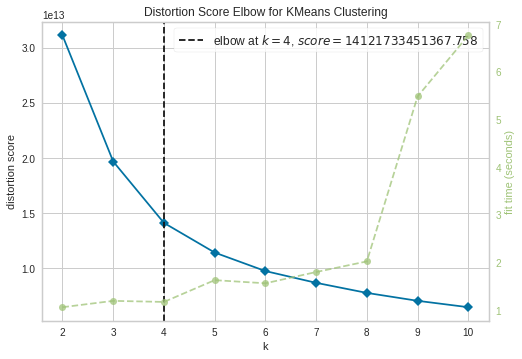

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# perform hyperparameter tuning using k-means clustering to find optimal number of clusters
clustering_model = KMeans(max_iter=1000,init='k-means++',random_state=RANDOM_SEED)
visualizer = KElbowVisualizer(clustering_model, k=(2,11))

visualizer.fit(clustering_data[columns_except_risk])        # Fit the data except the risk column to the visualizer
visualizer.show() # Finalize and render the figure

In [ ]:
# From the above, the vertical black line denotes the location of elbow of curve. Hence, optimal number of clusters are 4 
OPTIMAL_CLUSTERS = 4

### Creating Clusters and visualizing using KMeans Clustering

**OBJECTIVE:**


>The objective of this section is to perform clustering using k-means and evaluating the quality of clusters using Silhouette Score and cluster visualization includng 2-Dimensional cluster data visualization and distribution of clusters 

In [ ]:
# Initialize the Kmeans Clustering function from scikit-learn
kmeans_clustering_model = KMeans(max_iter=1000, # Max number of iteration for centroids to converge
                      init='k-means++', # Using k-means++ initialization
                      n_clusters=OPTIMAL_CLUSTERS, # Number of optimal clusters as determined from the elbow curve
                      random_state=RANDOM_SEED) 

In [ ]:
# Perform the Kmeans clustering to determine the loan application and borrower attributes in 4 clusters
%%timeit
kmeans_clustering_model.fit(X = clustering_data[columns_except_risk])

1.2 s ± 118 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# silhouette score for Kmeans Clustering - This metrics evaluates how well clusters are created
print("Silhouette Score for Kmeans Clustering is: {:.2f}".format(silhouette_score(X = clustering_data[columns_except_risk],labels = kmeans_clustering_model.labels_,random_state=RANDOM_SEED)))

Silhouette Score for Kmeans Clustering is: 0.43


#### Assign the cluster label (or, cluster number) to Data

In [ ]:
# Assigning clusters using kmeans clustering
clustering_data['kmeans_cluster_labels'] = kmeans_clustering_model.labels_

#### Visualizing K Means Clustering Results (Using PyCaret Library)

In [ ]:
clustering_experiments = setup(data = clustering_data[columns_except_risk],numeric_features=['loan_amnt',
                                                                        'emp_length',
                                                                        'avg_fico_range',
                                                                        'int_rate',
                                                                        'annual_inc',
                                                                        'dti',
                                                                        'open_acc',
                                                                        'revol_bal'],
                               session_id=42)

Description                 Value
0                               session_id                    42
1                            Original Data            (30000, 8)
2                           Missing Values                 False
3                         Numeric Features                     8
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (30000, 8)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  4b28
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                 False
22                        Normalize Method                  None
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=['loan_amnt',
                                                          'emp_length',
                                                          'avg_fico_range',
                                                          'int_rate',
                                                          'annual_inc', 'dti',
                                                          'open_acc',
                                                          'revol_bal'],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                   

In [ ]:
# PCA plot of Clusters using K-means - Vizualizing in two Dimensions
plot_model(kmeans_clustering_model)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


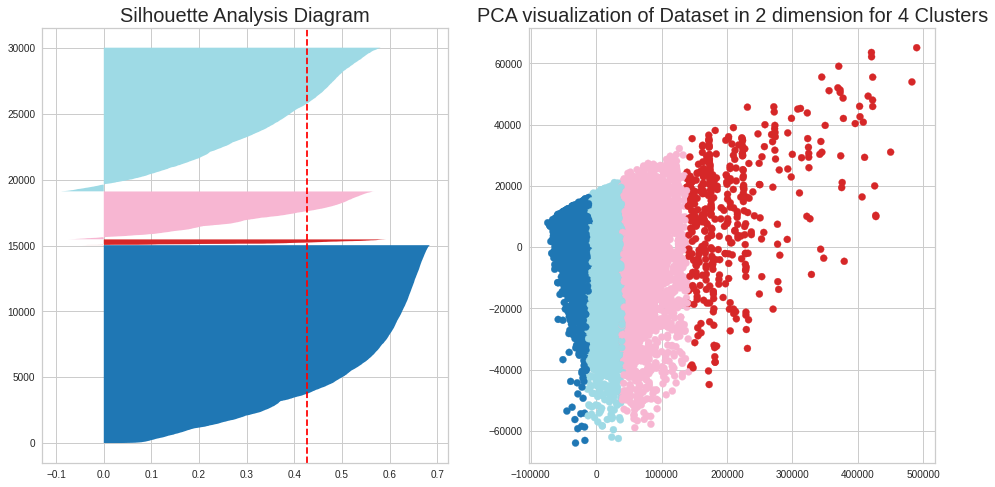

In [ ]:
cmap = cm.get_cmap("tab20")
vmin = 0
labels = kmeans_clustering_model.labels_
vmax = max(labels)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
sil_coeff = silhouette_samples(clustering_data[columns_except_risk], labels)
sil_score = silhouette_score(clustering_data[columns_except_risk],labels,random_state=RANDOM_SEED)

fig, ax = plt.subplots(1,2, figsize=(16,8))
plot_gap = 10
y_lower = 0
for label in range(OPTIMAL_CLUSTERS):
    sil_coeff_label = sil_coeff[labels == label]
    sil_coeff_label.sort()
    size_cluster = sil_coeff_label.shape[0]
    y_upper = y_lower + size_cluster
    
    rgba = cmap(norm(label))
    label_color = np.array(rgba).reshape((1,4))
    ax[0].fill_betweenx(np.arange(y_lower,y_upper), 0, sil_coeff_label,facecolor = label_color)
    y_lower = y_upper + plot_gap
    

pca = PCA(n_components=2,random_state=RANDOM_SEED)
data_2d = pca.fit_transform(clustering_data[columns_except_risk])
ax[1].scatter(data_2d[:,0], data_2d[:,1], c=labels, cmap=cmap)
ax[0].axvline(sil_score, color="red", linestyle="--")
ax[0].set_title("Silhouette Analysis Diagram")
ax[1].set_title("PCA visualization of Dataset in 2 dimension for 4 Clusters")
for item in ([ax[0].title]):
    item.set_fontsize(20)

for item in ([ax[1].title]):
    item.set_fontsize(20)
plt.show()

In [ ]:
# Visualize 4 clusters from the data in 3-dimensions using TSNE 
plot_model(kmeans_clustering_model,plot='tsne')

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(kmeans_clustering_model,plot='distribution')

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


### Creating Clusters using Hierarchical Clustering

**OBJECTIVE:**


>The objective of this section is to perform clustering using Hierarchical Clustering algorithm and evaluating the quality of clusters using Silhouette Score and cluster visualization includng 2-Dimensional cluster data visualization and distribution of clusters 

In [ ]:
# Initialize the Agglomerative Hierarchical Clustering using scikit-learn library
agglomerative_clustering_model = AgglomerativeClustering(n_clusters=OPTIMAL_CLUSTERS, # Number of clusters are 4
                                                         affinity='euclidean',
                                                         linkage='ward') 

In [ ]:
%%timeit
# Perform the Agglomerative Hierarchical Clustering to determine the loan application and borrower attributes in 4 clusters
agglomerative_clustering_model.fit(X = clustering_data[columns_except_risk])

43 s ± 2.71 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# Z = hierarchy.linkage(agglomerative_clustering_model.children_, 'ward')
# plt.figure(figsize=(20,10))
# dn = hierarchy.dendrogram(Z)

In [ ]:
# silhouette score for Hierarchical Clustering
print("silhouette score for Hierarchical Clustering is : {:.2f}".format(silhouette_score(X = clustering_data[columns_except_risk],labels = agglomerative_clustering_model.labels_,random_state=RANDOM_SEED)))

silhouette score for Hierarchical Clustering is : 0.39


#### Assign the cluster label (or, cluster number) to Data

In [ ]:
# Assigning clusters using hierarchical clustering
clustering_data['hierarchical_cluster_labels'] = agglomerative_clustering_model.labels_

#### Visualizing Hierarchical Clustering Results (Using PyCaret Library)

In [ ]:
# PCA plot of Clusters using Hierarchical CLustering - Vizualizing in two Dimensions
plot_model(agglomerative_clustering_model)

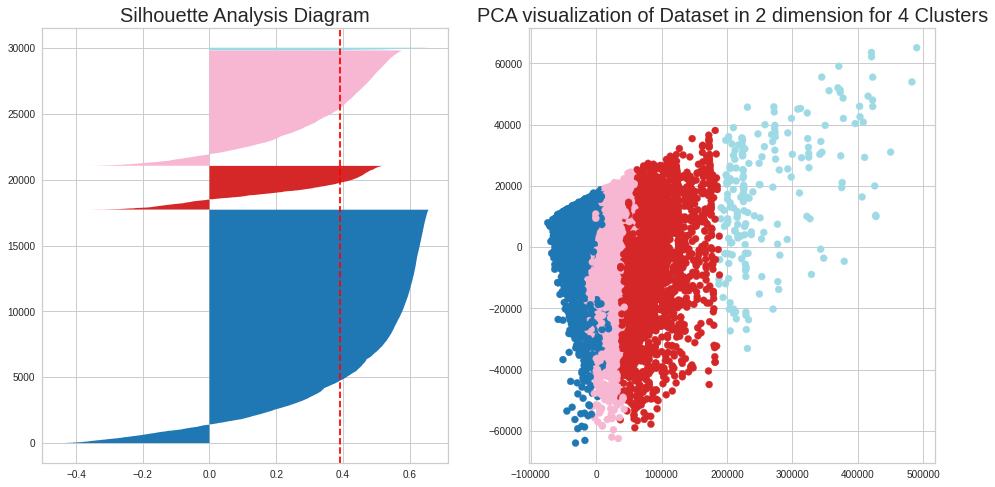

In [ ]:
cmap = cm.get_cmap("tab20")
vmin = 0
labels = agglomerative_clustering_model.labels_
vmax = max(labels)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
sil_coeff = silhouette_samples(clustering_data[columns_except_risk], labels)
sil_score = silhouette_score(clustering_data[columns_except_risk],labels,random_state=RANDOM_SEED)

fig, ax = plt.subplots(1,2, figsize=(16,8))
plot_gap = 10
y_lower = 0
for label in range(OPTIMAL_CLUSTERS):
    sil_coeff_label = sil_coeff[labels == label]
    sil_coeff_label.sort()
    size_cluster = sil_coeff_label.shape[0]
    y_upper = y_lower + size_cluster
    
    rgba = cmap(norm(label))
    label_color = np.array(rgba).reshape((1,4))
    ax[0].fill_betweenx(np.arange(y_lower,y_upper), 0, sil_coeff_label,facecolor = label_color)
    y_lower = y_upper + plot_gap
    

pca = PCA(n_components=2,random_state=RANDOM_SEED)
data_2d = pca.fit_transform(clustering_data[columns_except_risk])
ax[1].scatter(data_2d[:,0], data_2d[:,1], c=labels, cmap=cmap)
ax[0].axvline(sil_score, color="red", linestyle="--")
ax[0].set_title("Silhouette Analysis Diagram")
ax[1].set_title("PCA visualization of Dataset in 2 dimension for 4 Clusters")
for item in ([ax[0].title]):
    item.set_fontsize(20)

for item in ([ax[1].title]):
    item.set_fontsize(20)
plt.show()

### Clustering Result Interpretation

**OBJECTIVE:**


>The objective of this section is to interpret the clusters using the probability of default risk assigned to each cluster. This section demands the use of probability concepts to determine the probability associated with each individual cluster

In [ ]:
clustering_data

loan_amnt  emp_length  avg_fico_range  int_rate  annual_inc    dti  \
0         5000.0          10           697.0      5.32     70000.0  11.14   
1         6000.0           5           777.0      5.42     50508.0   2.42   
2        13000.0           7           702.0     13.56    100000.0  13.37   
3         1500.0           0           682.0     15.49     30000.0  34.96   
4        21350.0           0           692.0     12.35     90000.0  21.64   
...          ...         ...             ...       ...         ...    ...   
29995     2500.0           3           677.0     16.14     28000.0   9.17   
29996     3000.0           0           697.0     12.42     15600.0   3.46   
29997     9000.0           0           712.0     16.14     48000.0  32.35   
29998     8400.0           0           702.0     17.09     25000.0  34.42   
29999    12000.0           2           682.0     17.77     42000.0  30.26   

       open_acc  revol_bal  HighRisk_LowRisk  kmeans_cluster_labels  \
0           6.0     7538.0                 0                      3   
1           7.0     5794.0                 0                      0   
2          12.0    11839.0                 0                      3   
3           6.0     1228.0                 0                      0   
4           9.0    23224.0                 0                      3   
...         ...        ...               ...                    ...   
29995       5.0     4787.0                 1                      0   
29996      10.0     3600.0                 1                      0   
29997       7.0    18493.0                 1                      0   
29998       6.0     6009.0                 1                      0   
29999      10.0    13640.0                 1                      0   

       hierarchical_cluster_labels  
0                                0  
1                                0  
2                                2  
3                                0  
4                                2  
...                            ...  
29995                            0  
29996                            0  
29997                            0  
29998                            0  
29999                            0  

[30000 rows x 11 columns]

In [ ]:
'''
Find the probability of default/non-default of new loan borrower per cluster per borrower

'''
total_borrowers = clustering_data.shape[0]
total_defaults = clustering_data['HighRisk_LowRisk'].sum()

# Calculate the number of borrowers and defaults in each cluster
cluster_counts = clustering_data.groupby('kmeans_cluster_labels')['HighRisk_LowRisk'].value_counts()

# Calculate the probability of default for each cluster
prob_default = cluster_counts / total_borrowers

In [ ]:
prob_default = pd.DataFrame(prob_default)
prob_default.columns=["Probability of Default"]
prob_default = prob_default.reset_index()
prob_default

kmeans_cluster_labels  HighRisk_LowRisk  Probability of Default
0                      0                 1                0.261600
1                      0                 0                0.239367
2                      1                 0                0.008700
3                      1                 1                0.005600
4                      2                 0                0.065900
5                      2                 1                0.055133
6                      3                 0                0.186033
7                      3                 1                0.177667

In [ ]:
'''
Determine the average probability of default per cluster
It shows the comaparison based loan amoutn request and annual income of the loan applicant. 
Based on the cluster, their application belongs to, their probabilty of default could be determined
'''
aggregated_kmeans_result_df = clustering_data.groupby(by = ['kmeans_cluster_labels']).agg({'loan_amnt':'mean','annual_inc':'mean'}).reset_index()
# Round the float numbers to three decimal places using apply and lambda
aggregated_kmeans_result_df['loan_amnt'] = aggregated_kmeans_result_df['loan_amnt'].apply(lambda x: round(x, 3))
aggregated_kmeans_result_df['annual_inc'] = aggregated_kmeans_result_df['annual_inc'].apply(lambda x: round(x, 3))

# Group data by kmeans_cluster_labels and sum up Probability of Default for each group
average_probability_of_default_per_cluster = prob_default.groupby('kmeans_cluster_labels')['Probability of Default'].sum().reset_index()
# Normalize Probability of Default so that the sum is 1
average_probability_of_default_per_cluster['Probability of Default'] /= average_probability_of_default_per_cluster['Probability of Default'].sum()
average_probability_of_default_per_cluster['Probability of Default'] = average_probability_of_default_per_cluster['Probability of Default'].apply(lambda x: round(x, 3))

In [ ]:
aggregated_kmeans_result_df

kmeans_cluster_labels  loan_amnt  annual_inc
0                      0  11372.723   45324.274
1                      1  24721.970  283687.961
2                      2  21666.442  142220.742
3                      3  17759.415   83495.597

In [ ]:
average_probability_of_default_per_cluster

kmeans_cluster_labels  Probability of Default
0                      0                   0.501
1                      1                   0.014
2                      2                   0.121
3                      3                   0.364

In [ ]:
probability_of_default_per_cluster = aggregated_kmeans_result_df.merge(average_probability_of_default_per_cluster,on='kmeans_cluster_labels')
probability_of_default_per_cluster

kmeans_cluster_labels  loan_amnt  annual_inc  Probability of Default
0                      0  11372.723   45324.274                   0.501
1                      1  24721.970  283687.961                   0.014
2                      2  21666.442  142220.742                   0.121
3                      3  17759.415   83495.597                   0.364

### Prediction of cluster on Random Loan and its interpretation in terms of Loan Default risk 

**OBJECTIVE:**


>The objective of this section is to perform prediction of a cluster that could be assigned to new loan application and estimating the probability of default using the probability associated with that cluster with trained k-means algorithm

In [ ]:
# Get the random loan application information from the dataset
random_loan_data = clustering_data.sample(n=1,random_state=RANDOM_SEED).iloc[:,:-3]
random_loan_data

loan_amnt  emp_length  avg_fico_range  int_rate  annual_inc    dti  \
2308     7500.0           9           717.0      7.35     53000.0  12.75   

      open_acc  revol_bal  
2308      16.0     4890.0

In [ ]:
# Predict the cluster and probability of default associated with that cluster using k-means clustering algorithm
for cluster,probability_of_default in zip(list(probability_of_default_per_cluster['kmeans_cluster_labels']), list(probability_of_default_per_cluster['Probability of Default'])):
  if kmeans_clustering_model.predict(random_loan_data)[0]==cluster:
    print("The Loan is assigned to cluster: {} and its probability of default is estimated to be: {}".format(cluster,probability_of_default))

The Loan is assigned to cluster: 0 and its probability of default is estimated to be: 0.501
